In [13]:
%matplotlib inline
import pybaseball as pb
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [14]:
team_data = pb.lahman.teams()

In [15]:
list(team_data)

['yearID',
 'lgID',
 'teamID',
 'franchID',
 'divID',
 'Rank',
 'G',
 'Ghome',
 'W',
 'L',
 'DivWin',
 'WCWin',
 'LgWin',
 'WSWin',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'CS',
 'HBP',
 'SF',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'IPouts',
 'HA',
 'HRA',
 'BBA',
 'SOA',
 'E',
 'DP',
 'FP',
 'name',
 'park',
 'attendance',
 'BPF',
 'PPF',
 'teamIDBR',
 'teamIDlahman45',
 'teamIDretro']

In [18]:
#must be wrapped in brackets!
team_data = team_data.loc[(team_data['yearID'] >= 1900) & (team_data['yearID'] <= 2015)]

In [19]:
team_data = team_data[['yearID', 'G', '3B', 'SB']]

team_data.head(5)

,yearID,G,3B,SB
375,1900,142,81,274.0
376,1900,142,68,182.0
377,1900,146,51,189.0
378,1900,144,83,183.0
379,1900,141,61,236.0


In [20]:
seasons = team_data['yearID'].tolist()
tbs = team_data['3B'].tolist()
sbs = team_data['SB'].tolist()
games = team_data['G'].tolist()
avg_tbs_per_team_per_game = [tb/g for tb, g in zip(tbs, games)]
avg_sbs_per_team_per_game = [sb/g for sb, g in zip(sbs, games)]

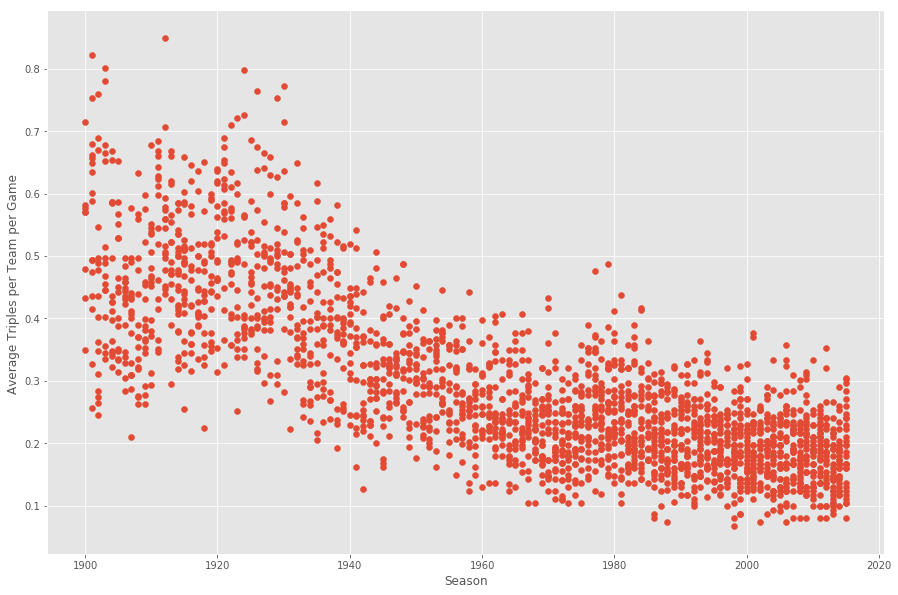

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(seasons, avg_tbs_per_team_per_game)
plt.xlabel('Season')
plt.ylabel('Average Triples per Team per Game ')
plt.show()

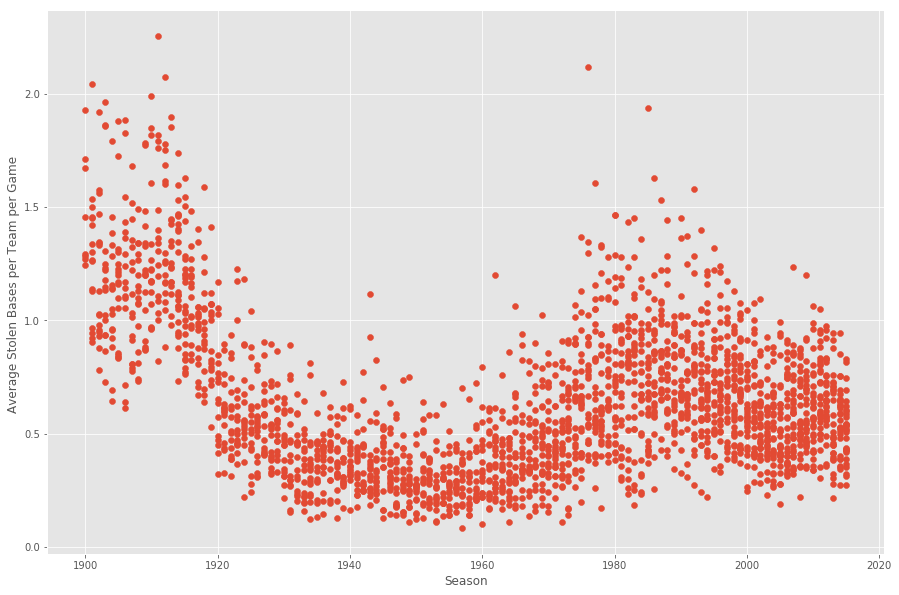

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(seasons, avg_sbs_per_team_per_game)
plt.xlabel('Season')
plt.ylabel('Average Stolen Bases per Team per Game ')
plt.show()

In [23]:
team_data.groupby(['yearID']).mean().head(5)

,G,3B,SB
yearID,,,
1900,142.250,75.8750,210.7500
1901,138.750,77.3750,178.1875
1902,139.375,61.4375,167.3125
1903,139.250,72.5625,170.9375
1904,156.125,72.1250,173.7500


In [27]:
agptps = team_data.groupby(['yearID']).mean()['G'].tolist() #average runs per team per season
atbptps = team_data.groupby(['yearID']).mean()['3B'].tolist() #average games per team per season
asbptps = team_data.groupby(['yearID']).mean()['SB'].tolist() #average home runs per team per season
atbagptps = [tb/g for tb, g in zip(atbptps, agptps)] #average runs / average games per team per season
asbagptps = [sb/g for sb, g in zip(asbptps, agptps)] # average home runs / average games per team per season
s = list(range(1900, 2016))

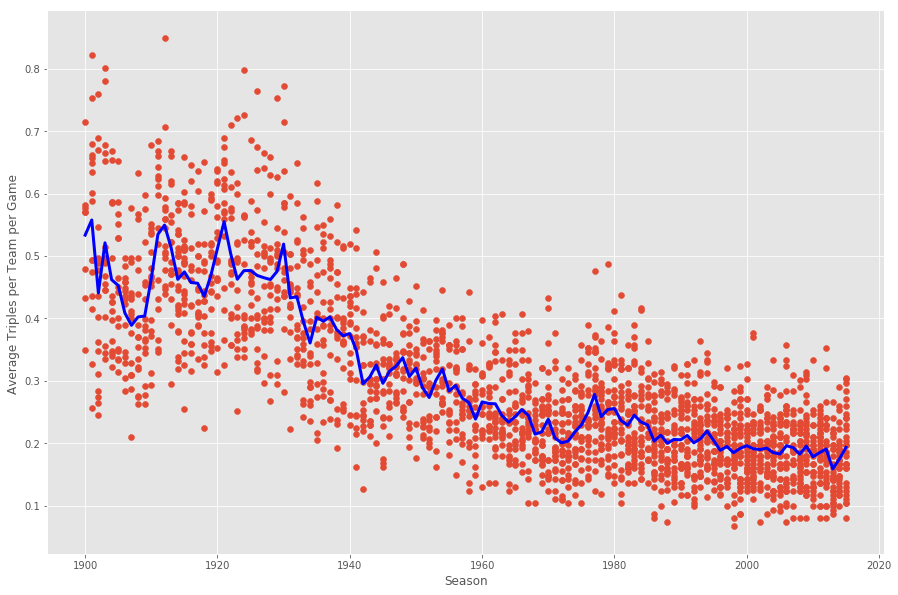

In [29]:
plt.figure(figsize=(15,10))
plt.scatter(seasons, avg_tbs_per_team_per_game)
plt.plot(s, atbagptps, 'b', linewidth=3)
plt.xlabel('Season')
plt.ylabel('Average Triples per Team per Game ')
plt.show()

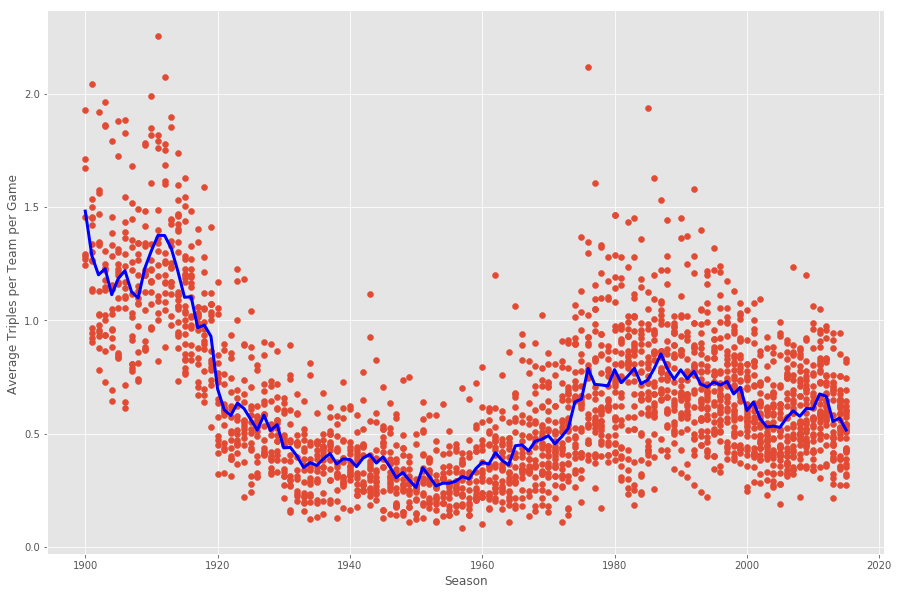

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(seasons, avg_sbs_per_team_per_game)
plt.plot(s, asbagptps, 'b', linewidth=3)
plt.xlabel('Season')
plt.ylabel('Average Triples per Team per Game ')
plt.show()